
[![AnalyticsDojo](https://github.com/rpi-techfundamentals/spring2019-materials/blob/master/fig/final-logo.png?raw=1)](http://rpi.analyticsdojo.com)
<center><h1>Titanic Cluster</h1></center>
<center><h3><a href = 'http://introml.analyticsdojo.com'>introml.analyticsdojo.com</a></h3></center>



# Titanic Classification - Titanic Visualize Decision Tree

As an example of how to work with both categorical and numerical data, we will perform survival predicition for the passengers of the HMS Titanic.


In [2]:
import os
import pandas as pd
train = pd.read_csv('https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/test.csv')

print(train.columns, test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Here is a broad description of the keys and what they mean:

```
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
survival        Survival
                (0 = No; 1 = Yes)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
boat            Lifeboat
body            Body Identification Number
home.dest       Home/Destination
```

In general, it looks like `name`, `sex`, `cabin`, `embarked`, `boat`, `body`, and `homedest` may be candidates for categorical features, while the rest appear to be numerical features. We can also look at the first couple of rows in the dataset to get a better understanding:

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Preprocessing function

We want to create a preprocessing function that can address transformation of our train and test set.  

In [4]:
from sklearn.impute import SimpleImputer
import numpy as np

cat_features = ['Pclass', 'Sex', 'Embarked']
num_features =  [ 'Age', 'SibSp', 'Parch', 'Fare'  ]


def preprocess(df, num_features, cat_features, dv):
    features = cat_features + num_features
    if dv in df.columns:
      y = df[dv]
    else:
      y=None 
    #Address missing variables
    print("Total missing values before processing:", df[features].isna().sum().sum() )
  
    imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    df[cat_features]=imp_mode.fit_transform(df[cat_features] )
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    df[num_features]=imp_mean.fit_transform(df[num_features])
    print("Total missing values after processing:", df[features].isna().sum().sum() )
   
    X = pd.get_dummies(df[features], columns=cat_features, drop_first=True)
    return y,X

y, X =  preprocess(train, num_features, cat_features, 'Survived')
test_y, test_X = preprocess(test, num_features, cat_features, 'Survived')

Total missing values before processing: 179
Total missing values after processing: 0
Total missing values before processing: 87
Total missing values after processing: 0


# Cluster Analysis

Lots of different ways to cluster data. 





In [29]:
results=pd.DataFrame()
Sum_of_squared_distances = []
Sum_of_squared_distances_std = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    membership=km.labels_
    results['S'+str(k)] = membership
    Sum_of_squared_distances.append(km.inertia_)

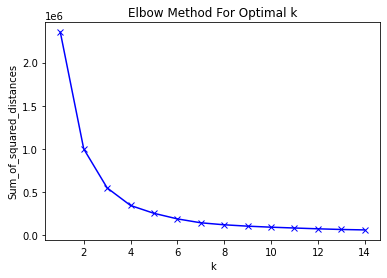

In [30]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [31]:
results

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14
0,0,0,0,2,1,3,5,0,6,7,1,1,11,8
1,0,0,2,0,4,1,6,4,8,0,8,6,2,11
2,0,0,0,2,1,3,5,0,6,7,10,5,0,13
3,0,0,2,0,4,1,6,4,5,8,6,0,8,9
4,0,0,0,2,1,3,5,0,6,1,10,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,2,1,3,5,0,6,1,10,5,0,13
887,0,0,0,2,1,3,0,6,2,4,9,9,7,4
888,0,0,0,2,1,3,5,7,7,9,4,9,7,6
889,0,0,0,2,1,3,0,7,7,9,4,9,7,6


In [32]:
#As You see, You can get wildly different results. 
pd.crosstab(results.loc[:,'S5'], results.loc[:,'S6'])

S6,0,1,2,3,4,5
S5,,,,,,
0,0,0,3,0,0,0
1,150,0,0,562,0,0
2,0,0,0,0,0,33
3,0,0,0,0,17,0
4,6,120,0,0,0,0


### Mutual Information Score

We need to use this rather than a confusion matrix. 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html

In [34]:
#Notice how we have correspondence, just different labels.
metrics.adjusted_mutual_info_score(results.loc[:,'S5'], results.loc[:,'S6'],) 

0.7308268840532705

In [36]:
#Notice if we just set a different seed
results=pd.DataFrame()
K = range(100,103)
for k in K:
    km = KMeans(n_clusters=5, random_state=k)
    km = km.fit(X)
    membership=km.labels_
    results['S'+str(k)] = membership
results

,S100,S101,S102
0,1,0,0
1,3,4,4
2,1,0,0
3,3,4,4
4,1,0,0
...,...,...,...
886,1,0,0
887,1,0,0
888,1,0,0
889,1,0,0


In [37]:
#Notice how we have correspondence, just different labels.
pd.crosstab(results.loc[:,'S100'], results.loc[:,'S101'])

S101,0,1,2,3,4
S100,,,,,
0,0,33,0,0,0
1,712,0,0,0,0
2,0,0,17,0,0
3,0,0,0,0,126
4,0,0,0,3,0


In [38]:
from sklearn import metrics
metrics.adjusted_mutual_info_score(results.loc[:,'S100'], results.loc[:,'S101']) 

1.0

In [46]:
['cluster_'+str(x) for x in range(len(X_new.columns))]

['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']

In [47]:
#To model and view correlations, we need to change cluster membership to a dummy. 
X_new=pd.get_dummies(results.loc[:,'S101'])
X_new.columns=['cluster_'+str(x) for x in range(len(X_new.columns))]
X_new.head()

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0


,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
Age,1.000000,-0.232625,-0.179191,0.091566,0.006589,-0.281004,0.084153,-0.013855,-0.019336,-0.160712,0.037477,0.006006,0.025201,0.157939
SibSp,-0.232625,1.000000,0.414838,0.159651,-0.055932,0.092548,-0.114631,-0.026354,0.068734,-0.227170,0.014779,0.045473,-0.027582,0.239940
Parch,-0.179191,0.414838,1.000000,0.216225,-0.000734,0.015790,-0.245489,-0.081228,0.060814,-0.169314,0.098906,0.137609,-0.003482,0.087637
Fare,0.091566,0.159651,0.216225,1.000000,-0.118557,-0.413333,-0.182333,-0.117216,-0.162184,-0.700117,0.390546,0.578422,0.561893,0.272870
Pclass_2,0.006589,-0.055932,-0.000734,-0.118557,1.000000,-0.565210,-0.064746,-0.127301,0.189980,0.186593,-0.100049,-0.071149,-0.029652,-0.127471
Pclass_3,-0.281004,0.092548,0.015790,-0.413333,-0.565210,1.000000,0.137143,0.237449,-0.015104,0.437251,-0.217282,-0.154518,-0.064397,-0.313649
Sex_male,0.084153,-0.114631,-0.245489,-0.182333,-0.064746,0.137143,1.000000,-0.074115,0.119224,0.181289,-0.129009,-0.086019,0.002321,-0.105153
Embarked_Q,-0.013855,-0.026354,-0.081228,-0.117216,-0.127301,0.237449,-0.074115,1.000000,-0.499421,0.134274,-0.060318,-0.042895,-0.017877,-0.101895
Embarked_S,-0.019336,0.068734,0.060814,-0.162184,0.189980,-0.015104,0.119224,-0.499421,1.000000,0.130364,-0.105494,-0.079475,-0.094382,-0.045833
cluster_0,-0.160712,-0.227170,-0.169314,-0.700117,0.186593,0.437251,0.181289,0.134274,0.130364,1.000000,-0.391135,-0.278152,-0.115922,-0.809409


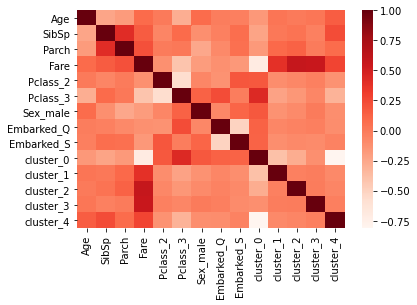

In [48]:
XALL=pd.concat([X,X_new],axis=1)

import seaborn as sb
corr = XALL.corr()
sb.heatmap(corr, cmap="Reds")
corr

### Train Test Split

Now we are ready to model. We are going to separate our Kaggle given data into a "Train" and a "Validation" set. 



In [49]:
#Import Module
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X_new, y, train_size=0.7, test_size=0.3, random_state=122,stratify=y)

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics

In [52]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth=3)
#This fits the model object to the data.
classifier.fit(train_X, train_y)
#This creates the prediction. 
train_y_pred = classifier.predict(train_X)
val_y_pred = classifier.predict(val_X)

print("Metrics score train: ", metrics.accuracy_score(train_y, train_y_pred) )
print("Metrics score validation: ", metrics.accuracy_score(val_y, val_y_pred) )

Metrics score train:  0.666131621187801
Metrics score validation:  0.6753731343283582
